In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tools import ScalarTool

/Users/cmiless/miniconda3/envs/lit/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


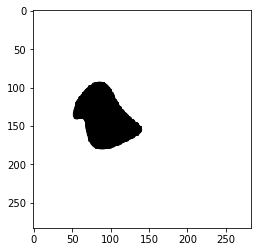

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('blob.png')     
img_gray = rgb2gray(img)    
th_img = 2.0*(img_gray -0.5)

plt.imshow(th_img, cmap = plt.get_cmap('gray'))
plt.show()

283 283
(2048, 2048)
(256, 256)


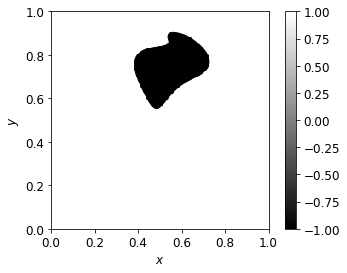

In [25]:

### Pad array

th_img = np.transpose(np.flipud(th_img))

(width,height) = np.shape(th_img)
print(width,height)
th0 = np.ones((2048,2048))
th0[:width,:height] = th_img
print(np.shape(th0))
N=256
xpos1 = 4
xpos2 = xpos1+N
ypos1 = 0
ypos2 = ypos1+N
th0 = th0[xpos1:xpos2,ypos1:ypos2]
th0 = th0[::1,::1]

print(np.shape(th0))

# # plt.imshow(th0, cmap = plt.get_cmap('gray'))
N,_ = np.shape(th0)
st = ScalarTool(N,1.0)
st.plot(th0)
plt.show()





In [32]:
from simulations import lit_enstrophy_sim
from integrators import RK4_timestepper, mega_RK4_timestepper, integrator2
from tools import ScalarTool, create_grid, dt_cfl, N_boyd
from post_processing import plot_norms, movie
from operators import OperatorKit
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pickle
import os
import sys

L =1
Pe=10000
T=1.0
# Pe=16
# T=0.005
reported_num_time_pts=50
gamma=1.0
cfl=True
kappa = 0.0
# kappa = 1.0/Pe

# Create tool box
okit = OperatorKit(N, L, kappa)
# Initial condition
X = create_grid(N, L)
#th0 = np.sin((2.0 * np.pi / L) * X[0])

# Create operators: d th / dt = operator (th)
def lit_enstrophy_op(scalar):
    return okit.lit_enstrophy_op(scalar, gamma, dealias=False)

def sin_op(scalar):
    return okit.sin_flow_op(scalar)

# Perform simulation
time_array = np.linspace(0, T, reported_num_time_pts)

# perform perturbation
th0 = RK4_timestepper(sin_op, th0, 0.001 * T)
if cfl is True:
    dt0_cfl = dt_cfl(N, L, kappa, gamma * L)
    th = integrator2(lit_enstrophy_op, mega_RK4_timestepper,
                     th0, time_array, dt0_cfl)
else:
    th = integrator(lit_enstrophy_op, RK4_timestepper, th0, time_array)



# Output
output_folder = 'output-pe=%d' % Pe + '-N=%d' % N + '/'
os.system('mkdir ' + output_folder)
os.system('cp lit_enstrophy.py ' + output_folder)

plt.figure()
st = ScalarTool(N, L)
st.plot(th[-1])
plt.savefig(output_folder + 'plot_final_frame-pe=%d' %
            Pe + '-N=%d' % N + '.png')

plt.figure()
plot_norms(time_array, th, N, L)
plt.savefig(output_folder + 'plot_norms-pe=%d' % Pe + '-N=%d' % N + '.png')

movie(time_array, th, N, L, output_path=output_folder)

output = open(output_folder + 'pe=%d' % Pe + '-N=%d' % N + '.pkl', 'wb')
pickle.dump([time_array, th], output)
output.close()


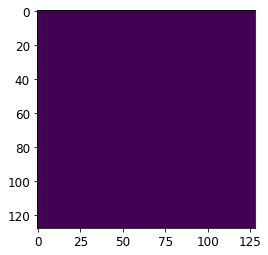

0
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [80]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tools import ScalarTool
N=128

pattern = Image.new('L',(N,N))
size = width, height = pattern.size
draw = ImageDraw.Draw(pattern,'L')
font = ImageFont.truetype("cmunrm.ttf", 100)

draw.text((10,10), "Hello World",font=font)

array = mpimg.pil_to_array(pattern)
#st = ScalarTool(N,1.0)
plt.imshow(array)
#st.plot(array)
plt.show()

print(np.amax(array))
print(array)

In [30]:
th0save = th[-1]

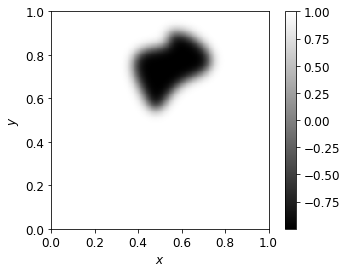

/Users/cmiless/miniconda3/envs/lit/lib/python3.6/site-packages/matplotlib/axes/_base.py:1410: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  'yscale=%s' % (xscale, yscale))


ValueError: cannot convert float NaN to integer

In [29]:
st.plot(th[-1])
plt.show()

In [31]:
th0 = th[-1]